En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [2]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("datos/cars_price1.csv", index_col = 0)
df.head(2) 

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
ID,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16333 entries, 45654403 to 45793526
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             16333 non-null  int64  
 1   Levy              16333 non-null  int64  
 2   Manufacturer      16333 non-null  object 
 3   Model             16333 non-null  object 
 4   Prod. year        16333 non-null  int64  
 5   Category          16333 non-null  object 
 6   Leather interior  16333 non-null  object 
 7   Fuel type         16333 non-null  object 
 8   Engine volume     16333 non-null  object 
 9   Mileage           16333 non-null  int64  
 10  Cylinders         16333 non-null  float64
 11  Gear box type     16333 non-null  object 
 12  Drive wheels      16333 non-null  object 
 13  Doors             16333 non-null  int64  
 14  Color             16333 non-null  object 
 15  Airbags           16333 non-null  int64  
dtypes: float64(1), int64(6), objec

- ¿Qué diferencia existe entre el error de tipo I y el error de tipo II?

El error de tipo I corresponderia con el falso positivo y el de tipo II con el falso negativo. Por convenio, el H0 parte de la negación de la hipótesis que se quiere probar y H1 parte de la afirmación de la misma.

- ¿Qué es la asimetría?

Es la falta de simetría que presenta una distribución teniendo en cuenta la media. Se determina en la forma que la media, la mediana y la moda de una distribución se relacionan entre si.

- ¿Es vuestra variable respuesta `Price` asimétrica?

In [ ]:
df['Price'].skew()

3.5235105169343446

Vemos que nuestro valor es positivo. Significa que es una distribución asimétrica positiva y por lo tanto nuestros datos no son normales.

- ¿Qué tipo de curtosis presenta vuestra variable respuesta `Price`?

In [ ]:
kurtosistest(df['Price'])

KurtosistestResult(statistic=67.05927185168431, pvalue=0.0)

Vemos que nuestra variable respuesta tiene una forma leptocúrtica porque el resultado de curtosis es mayor que 0.

In [ ]:
df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075], dtype=int64)

- ¿Es vuestra variable respuesta `Price` normal? Demostrarlo visual y analíticamente.

Usamos un histplot para demostrarlo visualmente.

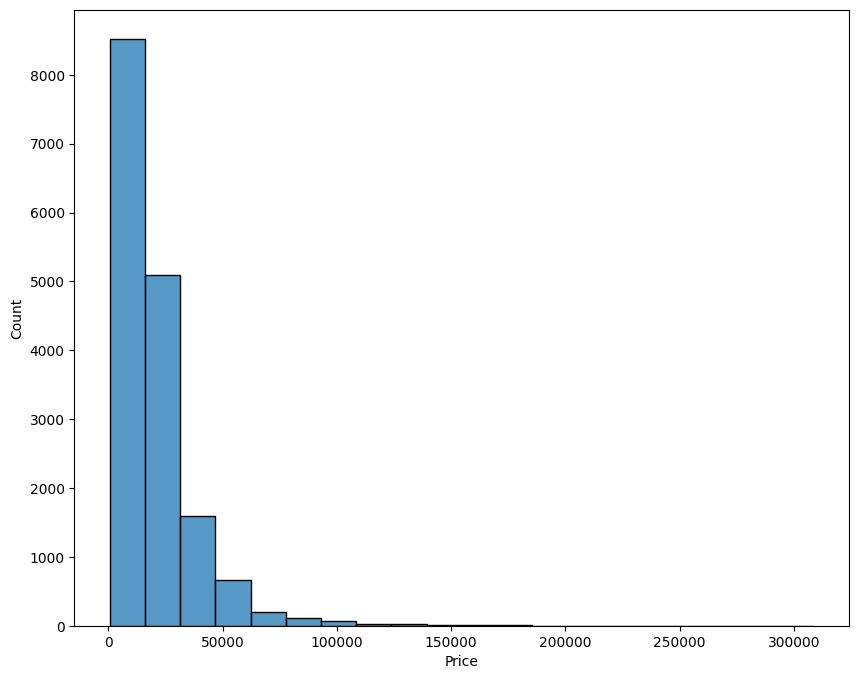

In [ ]:
sns.histplot(df['Price'], bins = 20);

Usamos un Test de Kolmogorov-Smirnov para demostrarlo analíticamente ya que nuestra muestra es de más de 5000 registros.

In [ ]:
kstest(df['Price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

> Nuestro *p-valor* < 0.05, podemos rechazar la H0 por lo que los datos son no normales.


> A través del gráfico también podemos decir que nuestros datos son no normales, la gráfica no es ni parecida a una campana de Gauss. 